1. Are there any differences between the genders, ethnicities, and parental level of education with respect to their performances in exams?
2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?
3. Does the test preparation course seem to have an effect on the exam performances?
4. Which 2 exam scores are most correlated with each other?

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
from scipy.stats.stats import ttest_ind
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

In [6]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'studentsperformance'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

student_df = pd.read_sql_query('select * from studentsperformance',con=engine)

engine.dispose()

student_df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [7]:
#1. Are there any differences between the genders, ethnicities and parental level of education with respect to their performances in exams?
student_df.groupby("gender").mean()[["math score", "reading score", "writing score"]]


,math score,reading score,writing score
gender,,,
female,63.633205,72.608108,72.467181
male,68.728216,65.473029,63.311203


In [9]:
ttest_ind(student_df[student_df.gender == "female"][["math score", "reading score", "writing score"]],
          student_df[student_df.gender == "male"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([-5.38324587,  7.95930801,  9.97955791]), pvalue=array([9.12018555e-08, 4.68053874e-15, 2.01987771e-22]))

It seems that females are more successful at reading and writing whereas males are more successful at math. The t-tests justify that the differences are statistically significant.

In [10]:
student_df.groupby("race/ethnicity").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
race/ethnicity,,,
group A,61.629213,64.674157,62.674157
group B,63.452632,67.352632,65.600000
group C,64.463950,69.103448,67.827586
group D,67.362595,70.030534,70.145038
group E,73.821429,73.028571,71.407143


In [25]:
# Test whether group differences are significant.
ethnicities = student_df["race/ethnicity"].unique()
grouped_off = student_df.groupby("race/ethnicity")
for var in ["math score", "reading score", "writing score"]:
  print("--------------------------------------------------")
  print("Comparisons for variable: {}".format(var))
  print("--------------------------------------------------")
  for i in range(0, len(ethnicities)):
    for j in range(i+1, len(ethnicities)):
      
      print("t-test between groups {0} and {1}".format(ethnicities[i], ethnicities[j]))
      
      print(ttest_ind(student_df[student_df["race/ethnicity"] == ethnicities[i]][var],
                student_df[student_df["race/ethnicity"] == ethnicities[j]][var]))

--------------------------------------------------
Comparisons for variable: math score
--------------------------------------------------
t-test between groups group B and group C
Ttest_indResult(statistic=-0.7315669893534263, pvalue=0.4647708939167453)
t-test between groups group B and group A
Ttest_indResult(statistic=0.9355076279747488, pvalue=0.3503415961659957)
t-test between groups group B and group D
Ttest_indResult(statistic=-2.82845539712675, pvalue=0.004886197137104194)
t-test between groups group B and group E
Ttest_indResult(statistic=-6.007397050552227, pvalue=5.007946047497971e-09)
t-test between groups group C and group A
Ttest_indResult(statistic=1.5997220303217299, pvalue=0.11043810745588042)
t-test between groups group C and group D
Ttest_indResult(statistic=-2.41858624746011, pvalue=0.015888349556016285)
t-test between groups group C and group E
Ttest_indResult(statistic=-6.127642520822135, pvalue=1.927238849552764e-09)
t-test between groups group A and group D
Ttes


Taking into account the t statistics, there are significant differences except between the groups A, B and C.

In [26]:
student_df.groupby("parental level of education").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
parental level of education,,,
associate's degree,67.882883,70.927928,69.896396
bachelor's degree,69.389831,73.000000,73.381356
high school,62.137755,64.704082,62.448980
master's degree,69.745763,75.372881,75.677966
some college,67.128319,69.460177,68.840708
some high school,63.497207,66.938547,64.888268


In [32]:
# Test whether group differences are significant.
ethnicities = student_df["parental level of education"].unique()
grouped_off = student_df.groupby("parental level of education")
for var in ["math score", "reading score", "writing score"]:
  print("--------------------------------------------------")
  print("Comparisons for variable: {}".format(var))
  print("--------------------------------------------------")
  for i in range(0, len(ethnicities)):
    for j in range(i+1, len(ethnicities)):
      print("ttesting between {0} and {1}:".format(ethnicities[i],ethnicities[j]))
      print(ttest_ind(student_df[student_df["parental level of education"] == ethnicities[i]][var],
                student_df[student_df["parental level of education"] == ethnicities[j]][var]))

--------------------------------------------------
Comparisons for variable: math score
--------------------------------------------------
ttesting between bachelor's degree and some college:
Ttest_indResult(statistic=1.3702352829617477, pvalue=0.17151224218471559)
ttesting between bachelor's degree and master's degree:
Ttest_indResult(statistic=-0.14868196568849312, pvalue=0.8819757824867702)
ttesting between bachelor's degree and associate's degree:
Ttest_indResult(statistic=0.8786641889793243, pvalue=0.38020757818036177)
ttesting between bachelor's degree and high school:
Ttest_indResult(statistic=4.236143622484822, pvalue=2.9965345853843376e-05)
ttesting between bachelor's degree and some high school:
Ttest_indResult(statistic=3.196718602676573, pvalue=0.0015409192922812146)
ttesting between some college and master's degree:
Ttest_indResult(statistic=-1.2356334215824571, pvalue=0.21761956810347416)
ttesting between some college and associate's degree:
Ttest_indResult(statistic=-0.5

There are some significant differences between some groups like master's degree and high school.

In [34]:
#2. Are there any differences between the lunch types with respect to their performances in exams? If there are, how do you explain this?
student_df.groupby("lunch").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
lunch,,,
free/reduced,58.921127,64.653521,63.022535
standard,70.034109,71.654264,70.823256


In [46]:
ttest_ind(student_df[student_df.lunch == "free/reduced"][["math score", "reading score", "writing score"]],
          student_df[student_df.lunch == "standard"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([-11.83718047,  -7.45105647,  -8.0097842 ]), pvalue=array([2.41319560e-30, 2.00279665e-13, 3.18618958e-15]))

Yes, students who have standard lunch are more successful than the others.

In [47]:
#3. Does the test preparation course seem to have an effect on the exam performances?
student_df.groupby("test preparation course").mean()[["math score", "reading score", "writing score"]]

,math score,reading score,writing score
test preparation course,,,
completed,69.695531,73.893855,74.418994
none,64.077882,66.534268,64.504673


In [49]:
ttest_ind(student_df[student_df["test preparation course"] == "completed"][["math score", "reading score", "writing score"]],
          student_df[student_df["test preparation course"] == "none"][["math score", "reading score", "writing score"]])

Ttest_indResult(statistic=array([ 5.70461642,  7.87166354, 10.40917344]), pvalue=array([1.53591346e-08, 9.08178334e-15, 3.68529174e-24]))

Yes, those who completed the test preparation course are more successfull than the others.

In [52]:
#4. Which two exam scores are correlated the most with each other?
student_df[["math score", "reading score", "writing score"]].corr()

,math score,reading score,writing score
math score,1.000000,0.817580,0.802642
reading score,0.817580,1.000000,0.954598
writing score,0.802642,0.954598,1.000000


Text(0.5, 1.0, 'correlation matrix (student performance)')

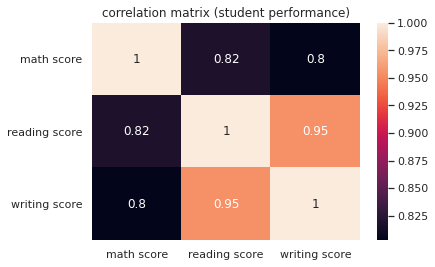

In [62]:
sns.heatmap(student_df.corr(),annot=True)
plt.title("correlation matrix (student performance)")

Reading and writing are more correlated than any other combination.